# PAQUETES

In [1]:
import pandas as pd
import geopandas as gpd

import contextily as ctx #agregar mosaicos a los mapas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

import warnings
warnings.filterwarnings('ignore') # Suprimir todas las advertencias

# CARGA DE DATOS

In [2]:
#Cargar el grid
Grid_50 = gpd.read_file(r'Data/Grid50/Grid_50Km_Europe_WGS84.shp')
Grid_50

,ET_ID,COUNTRY,geometry
0,249,Spain,"POLYGON ((-2.18083 34.85145, -2.71695 34.77839..."
1,280,Malta,"POLYGON ((14.68659 35.53849, 14.14122 35.56449..."
2,363,Spain,"POLYGON ((-2.79499 35.22702, -3.33331 35.15029..."
3,412,Greece,"POLYGON ((23.95653 35.05738, 23.41935 35.13773..."
4,413,Greece,"POLYGON ((24.49271 34.97391, 23.95653 35.05738..."
...,...,...,...
3101,9369,Norway,"POLYGON ((26.92771 70.58708, 25.63446 70.69412..."
3102,9370,Norway,"POLYGON ((28.20775 70.47181, 26.92771 70.58708..."
3103,9371,Norway,"POLYGON ((29.47384 70.34844, 28.20775 70.47181..."
3104,9372,Norway,"POLYGON ((30.72534 70.21713, 29.47384 70.34844..."


In [3]:
print("Sistema de coordenadas de la malla:")
print(Grid_50.crs)

Sistema de coordenadas de la malla:
EPSG:4326


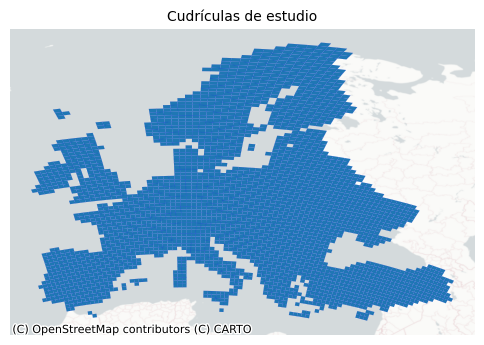

In [4]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(6, 6))

Grid_50.plot(ax=ax, edgecolor='blue', linewidth=0.05)
ctx.add_basemap(ax, crs=Grid_50.crs.to_string(), source=ctx.providers.CartoDB.PositronNoLabels) #Fondo del grafico
ax.set_axis_off() #no mostrar los ejes
plt.title("Cudrículas de estudio", fontsize=10)

plt.show()

## Bufonidae

In [5]:
Bufonidae = gpd.read_file(r'Data/01_PREPROCESADO/Data_Bufonidae_EU_processed.shp')
Bufonidae

,gbifID,FAMILY,GENUS,species,taxonRank,S_NAME,name,countryCod,decimalLat,decimalLon,...,day,month,year,date,basisOfRec,recordedBy,rounded_la,rounded_lo,species_da,geometry
0,2.885262e+09,Bufonidae,Bufo,Bufo bufo,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,DK,56.013943,12.205428,...,7.0,5,1981,1981-05-01,HUMAN_OBSERVATION,Gribskov Kommune,56.0139,12.2054,Bufo bufo_1981-05-07_Gribskov Kommune_56.0139_...,POINT (12.20543 56.01394)
1,3.120553e+09,Bufonidae,Bufo,Bufo bufo,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,CH,47.233840,8.924350,...,5.0,4,1981,1981-04-01,HUMAN_OBSERVATION,Knapp Noldi,47.2338,8.9244,Bufo bufo_1981-04-05_Knapp Noldi_47.2338_8.9244,POINT (8.92435 47.23384)
2,2.890155e+09,Bufonidae,Bufo,Bufo bufo,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,DK,55.777583,12.287408,...,10.0,4,1981,1981-04-01,HUMAN_OBSERVATION,Egedal Kommune,55.7776,12.2874,Bufo bufo_1981-04-10_Egedal Kommune_55.7776_12...,POINT (12.28741 55.77758)
3,3.120494e+09,Bufonidae,Bufo,Bufo bufo,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,CH,47.454930,9.195800,...,1.0,7,1981,1981-07-01,HUMAN_OBSERVATION,Schönenberger Karl,47.4549,9.1958,Bufo bufo_1981-07-01_Schönenberger Karl_47.454...,POINT (9.1958 47.45493)
4,3.120494e+09,Bufonidae,Bufo,Bufo bufo,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,CH,47.497800,9.329960,...,1.0,4,1981,1981-04-01,HUMAN_OBSERVATION,Zoller Josef,47.4978,9.3300,Bufo bufo_1981-04-01_Zoller Josef_47.4978_9.33,POINT (9.32996 47.4978)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86827,2.887541e+09,Bufonidae,Bufo,Bufo bufo,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,DK,56.010074,9.804242,...,3.0,8,2010,2010-08-01,HUMAN_OBSERVATION,Horsens Kommune,56.0101,9.8042,Bufo bufo_2010-08-03_Horsens Kommune_56.0101_9...,POINT (9.80424 56.01007)
86828,2.892948e+09,Bufonidae,Bufo,Bufo bufo,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,DK,55.991878,9.765569,...,8.0,7,2010,2010-07-01,HUMAN_OBSERVATION,Horsens Kommune,55.9919,9.7656,Bufo bufo_2010-07-08_Horsens Kommune_55.9919_9...,POINT (9.76557 55.99188)
86829,8.562001e+08,Bufonidae,Bufo,Bufo bufo,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,SE,55.719900,13.521590,...,17.0,8,2010,2010-08-01,HUMAN_OBSERVATION,Henrik Pihlemark,55.7199,13.5216,Bufo bufo_2010-08-17_Henrik Pihlemark_55.7199_...,POINT (13.52159 55.7199)
86830,2.894684e+09,Bufonidae,Bufo,Bufo bufo,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,DK,57.063364,10.086087,...,22.0,4,2010,2010-04-01,HUMAN_OBSERVATION,Aalborg Kommune,57.0634,10.0861,Bufo bufo_2010-04-22_Aalborg Kommune_57.0634_1...,POINT (10.08609 57.06336)


In [6]:
print("Sistema de coordenadas de la capa de registros de anuros europeos:")
print(Bufonidae.crs)

Sistema de coordenadas de la capa de registros de anuros europeos:
EPSG:4326


In [7]:
# Asegurarse de que ambos GeoDataFrames estén en el mismo sistema de coordenadas
Bufonidae = Bufonidae.to_crs(Grid_50.crs)
print(Bufonidae.crs)

EPSG:4326


In [8]:
# Seleccionar columnas
columnas_interes = ['species',  'geometry']
Bufonidae_sp = Bufonidae[columnas_interes]

print(Bufonidae_sp.columns)

Index(['species', 'geometry'], dtype='object')


In [9]:
list_species = Bufonidae_sp['species'].unique()

# Ordenar
list_species_sorted = sorted(list_species)
list_species_sorted

['Bufo bufo',
 'Bufo spinosus',
 'Bufotes boulengeri',
 'Bufotes cypriensis',
 'Bufotes viridis',
 'Epidalea calamita']

In [10]:
list_species_sorted = Bufonidae_sp['species'].unique()

#DataFrame vacío para almacenar las presencias de todas las especies
df_presencia_total = pd.DataFrame(index=Grid_50.index)

# Iterar sobre las especies únicas
for name in list_species_sorted:
    df_specie = Bufonidae_sp[Bufonidae_sp['species'] == name] # Filtrar los datos de la especie actual
    uniones = gpd.sjoin(df_specie, Grid_50, how='left', predicate='within') # Realizar la operación espacial: puntos dentro de polígonos (cuadrículas)

    # Crear una tabla pivote para que cada fila represente una cuadrícula
    # y las columnas representen las especies con la presencia de 1 si hay registros, 0 si no
    presencia = uniones.pivot_table(index='index_right', columns='species', aggfunc='size', fill_value=0) 

    # Asegurarse de que 'presencia' no esté vacío antes de renombrar las columnas
    if not presencia.empty:
        presencia.columns = [name]
        df_presencia_total = df_presencia_total.join(presencia, how='left')

df_presencia_total.fillna(0, inplace=True) # Reemplazar NaN por 0

cuadriculas_con_presencia = Grid_50.join(df_presencia_total, how='left')

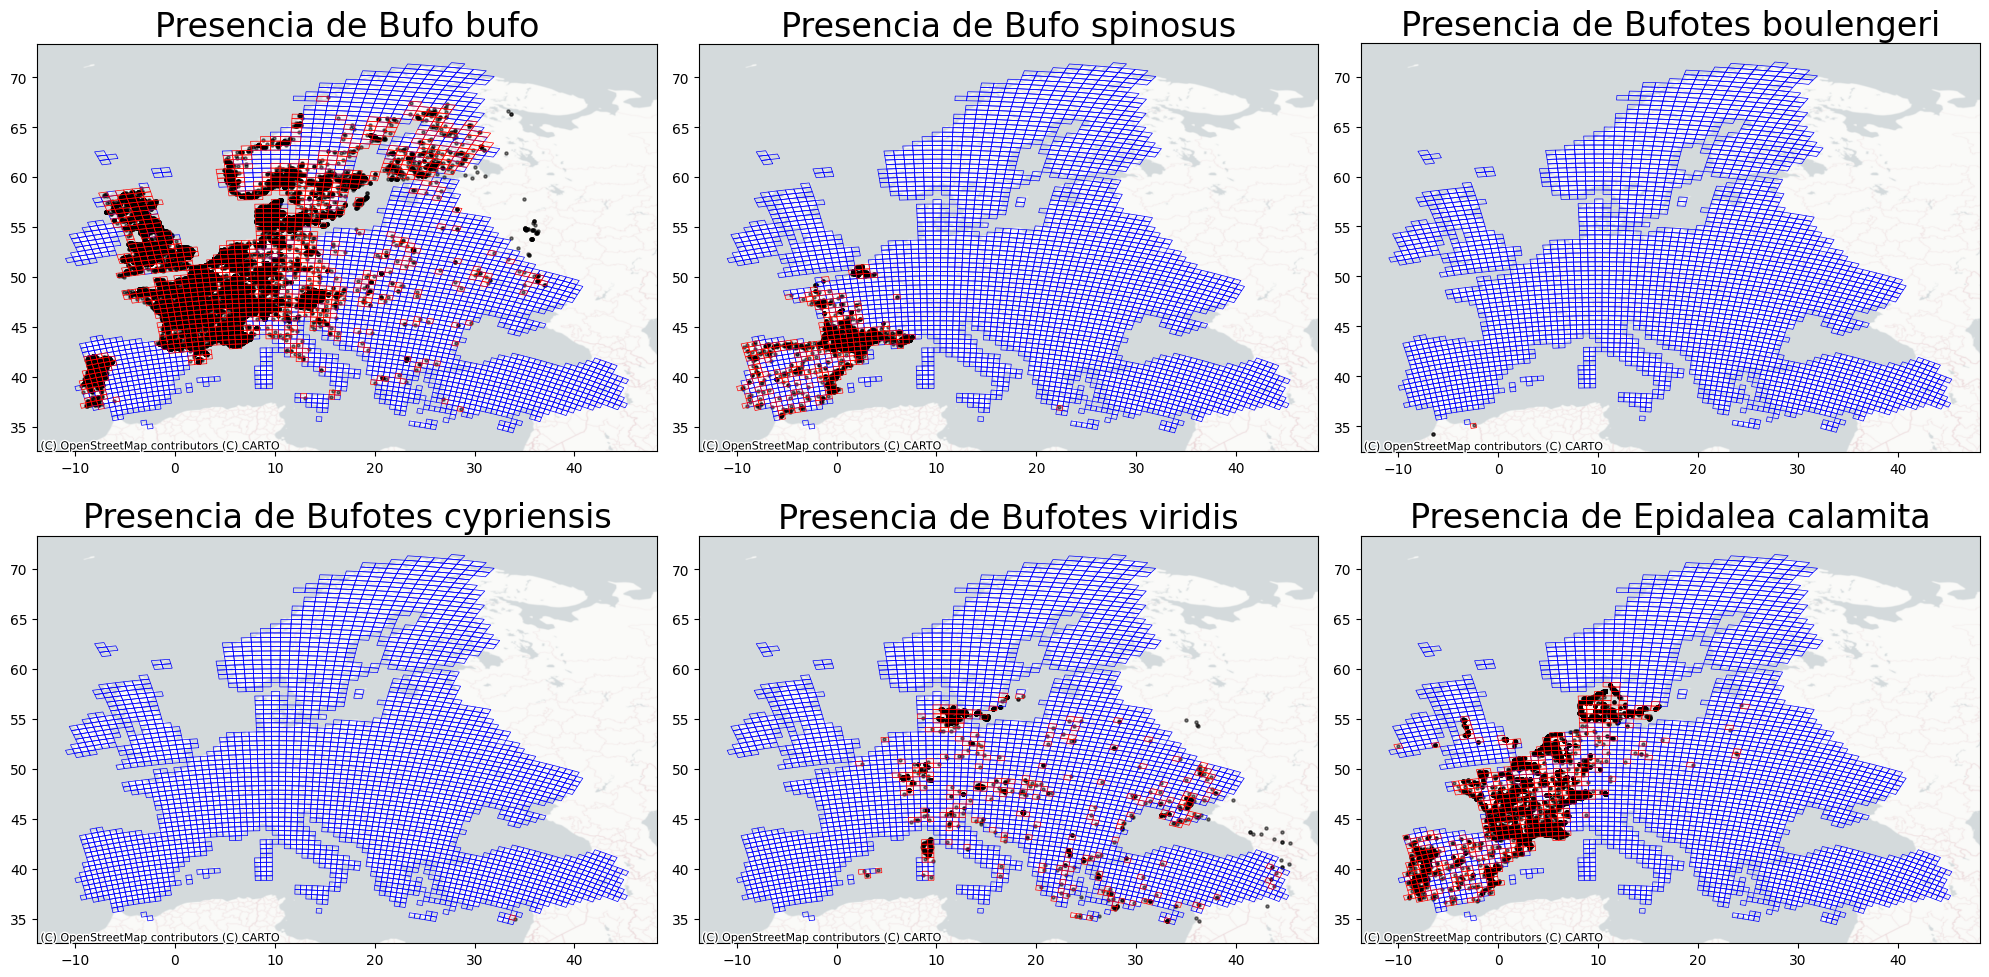

In [11]:
list_species_sorted = sorted(Bufonidae_sp['species'].unique())

# Calcular el tamaño de la cuadrícula para los subplots
num_species = len(list_species_sorted)
cols = 3  # Número de columnas en la cuadrícula
rows = math.ceil(num_species / cols)  # Número de filas en la cuadrícula

# Crear una figura y subplots
fig, axs = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axs = axs.flatten()

# Iterar sobre las especies ordenadas y los ejes
for idx, (name, ax) in enumerate(zip(list_species_sorted, axs)):
    try:
        # Filtrar las cuadrículas que tienen presencia de la especie actual
        cuadriculas_con_especie = cuadriculas_con_presencia[cuadriculas_con_presencia[name] > 0]

        # Filtrar las cuadrículas que no tienen presencia de la especie actual
        cuadriculas_sin_especie = cuadriculas_con_presencia[cuadriculas_con_presencia[name] == 0]

        # Trazar las cuadrículas sin presencia de la especie actual en azul
        cuadriculas_sin_especie.boundary.plot(ax=ax, color='blue', linewidth=0.5)

        # Trazar las cuadrículas con presencia de la especie actual en rojo
        cuadriculas_con_especie.boundary.plot(ax=ax, color='red', linewidth=0.5)

        # Filtrar los datos de la especie actual
        df_specie = Bufonidae_sp[Bufonidae_sp['species'] == name]
        df_specie.plot(ax=ax, color='black', markersize=5, alpha=0.5)

        ctx.add_basemap(ax, crs=cuadriculas_con_especie.crs.to_string(), source=ctx.providers.CartoDB.PositronNoLabels)

        ax.set_title(f'Presencia de {name}', fontsize=24) # Titulo
    except KeyError:
        continue

# Eliminar subplots vacíos si hay menos especies que subplots
for ax in axs[num_species:]:
    ax.remove()

plt.tight_layout()
plt.show()

No se tendran en cuenta aquellas especies cuya distribución espacial esta restringida a una zona concreta de Europa o el norte de África como es el caso de *Bufotes boulengeri* (Lataste, 1879) y *Bufotes cypriensis* (Litvinchuk, Mazepa, Jablonski and Dufresnes in Dufresnes et al., 2019). Por lo que se eliminarán del dataframe a partir de ahora.

In [12]:
# Exportar cuadriculas_con_presencia como archivo shapefile
#cuadriculas_con_presencia.to_file("Data/02_PROCESAMIENTO_ESPACIAL/cuadriculas_con_presencia_50km_v0.shp")

In [13]:
Species_matches = pd.read_excel('Species_matches_Bufonidae.xlsx')
Species_matches

,family,genus,species,id_sp
0,Bufonidae,Bufo,Bufo bufo,sp_1
1,Bufonidae,Bufo,Bufo spinosus,sp_2
2,Bufonidae,Bufotes,Bufotes boulengeri,sp_3
3,Bufonidae,Bufotes,Bufotes cypriensis,sp_4
4,Bufonidae,Bufotes,Bufotes viridis,sp_5
5,Bufonidae,Epidalea,Epidalea calamita,sp_6


In [14]:
cuadriculas_con_presencia.columns

Index(['ET_ID', 'COUNTRY', 'geometry', 'Bufo bufo', 'Epidalea calamita',
       'Bufotes viridis', 'Bufo spinosus', 'Bufotes cypriensis',
       'Bufotes boulengeri'],
      dtype='object')

In [15]:
# Crear un diccionario de correspondencia
correspondence_dict = dict(zip(Species_matches['species'], Species_matches['id_sp']))

# Renombrar las columnas del dataframe original usando el diccionario de correspondencia sin inplace
cuadriculas_con_presencia.rename(columns=correspondence_dict, inplace=True)
cuadriculas_con_presencia.columns


Index(['ET_ID', 'COUNTRY', 'geometry', 'sp_1', 'sp_6', 'sp_5', 'sp_2', 'sp_4',
       'sp_3'],
      dtype='object')

In [16]:
select_column_names = [
    'ET_ID','geometry',
    'sp_1', 'sp_2', 'sp_5', 'sp_6']

# Seleccionar y reordenar las columnas del DataFrame según select_column_names
cuadriculas_con_presencia = cuadriculas_con_presencia[select_column_names]
cuadriculas_con_presencia.columns

Index(['ET_ID', 'geometry', 'sp_1', 'sp_2', 'sp_5', 'sp_6'], dtype='object')

In [17]:
# Exportar cuadriculas_con_presencia como archivo shapefile
#cuadriculas_con_presencia.to_file("Data/02_PROCESAMIENTO_ESPACIAL/cuadriculas_con_presencia_50km.shp")

# Exportar cuadriculas_con_presencia como archivo CSV
#cuadriculas_con_presencia.to_csv("Data/02_PROCESAMIENTO_ESPACIAL/cuadriculas_con_presencia_50km.csv", index=False)

In [18]:
cuadriculas_con_presencia

,ET_ID,geometry,sp_1,sp_2,sp_5,sp_6
0.0,249,"POLYGON ((-2.18083 34.85145, -2.71695 34.77839...",0.0,0.0,0.0,0.0
1.0,280,"POLYGON ((14.68659 35.53849, 14.14122 35.56449...",0.0,0.0,0.0,0.0
2.0,363,"POLYGON ((-2.79499 35.22702, -3.33331 35.15029...",0.0,0.0,0.0,0.0
3.0,412,"POLYGON ((23.95653 35.05738, 23.41935 35.13773...",0.0,0.0,1.0,0.0
4.0,413,"POLYGON ((24.49271 34.97391, 23.95653 35.05738...",0.0,0.0,2.0,0.0
...,...,...,...,...,...,...
3101.0,9369,"POLYGON ((26.92771 70.58708, 25.63446 70.69412...",0.0,0.0,0.0,0.0
3102.0,9370,"POLYGON ((28.20775 70.47181, 26.92771 70.58708...",0.0,0.0,0.0,0.0
3103.0,9371,"POLYGON ((29.47384 70.34844, 28.20775 70.47181...",0.0,0.0,0.0,0.0
3104.0,9372,"POLYGON ((30.72534 70.21713, 29.47384 70.34844...",0.0,0.0,0.0,0.0


In [19]:
def to_binary_presence(value):
    return 1 if value > 5 else 0

In [20]:
# Seleccionar las columnas de especies (las que comienzan con 'sp_')
species_columns = [col for col in cuadriculas_con_presencia.columns if col.startswith('sp_')]

Grid_50_1_0 = cuadriculas_con_presencia.copy()

# Aplicar la función a las columnas de especies
for col in species_columns:
    Grid_50_1_0[col] = cuadriculas_con_presencia[col].apply(to_binary_presence)

Grid_50_1_0

,ET_ID,geometry,sp_1,sp_2,sp_5,sp_6
0.0,249,"POLYGON ((-2.18083 34.85145, -2.71695 34.77839...",0,0,0,0
1.0,280,"POLYGON ((14.68659 35.53849, 14.14122 35.56449...",0,0,0,0
2.0,363,"POLYGON ((-2.79499 35.22702, -3.33331 35.15029...",0,0,0,0
3.0,412,"POLYGON ((23.95653 35.05738, 23.41935 35.13773...",0,0,0,0
4.0,413,"POLYGON ((24.49271 34.97391, 23.95653 35.05738...",0,0,0,0
...,...,...,...,...,...,...
3101.0,9369,"POLYGON ((26.92771 70.58708, 25.63446 70.69412...",0,0,0,0
3102.0,9370,"POLYGON ((28.20775 70.47181, 26.92771 70.58708...",0,0,0,0
3103.0,9371,"POLYGON ((29.47384 70.34844, 28.20775 70.47181...",0,0,0,0
3104.0,9372,"POLYGON ((30.72534 70.21713, 29.47384 70.34844...",0,0,0,0


In [21]:
# Exportar cuadriculas_con_presencia como archivo shapefile
#Grid_50_1_0.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Grid_50_spp_1_0_V1.shp")

# Exportar cuadriculas_con_presencia como archivo CSV
#Grid_50_1_0.to_csv("Data/02_PROCESAMIENTO_ESPACIAL/Grid_50_spp_1_0_V1.csv", index=False)

In [22]:
list_species_sorted

['Bufo bufo',
 'Bufo spinosus',
 'Bufotes boulengeri',
 'Bufotes cypriensis',
 'Bufotes viridis',
 'Epidalea calamita']

### Mapas de presencia y ausencia para las especies seleccionadas

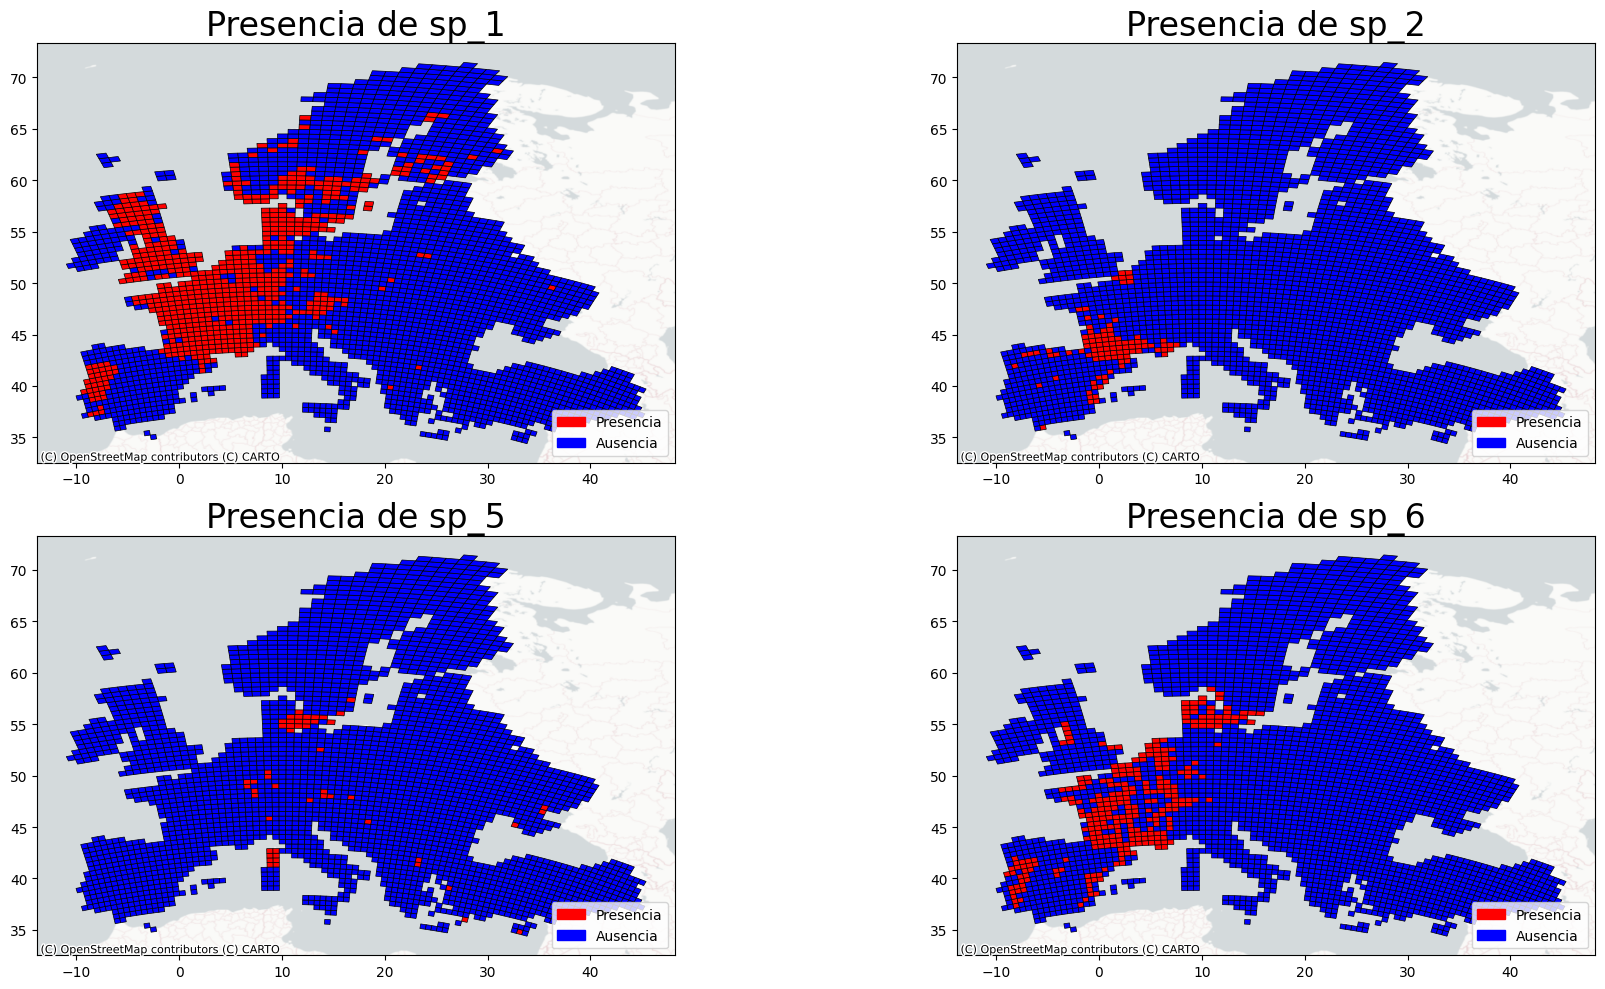

In [23]:
import matplotlib.patches as mpatches
import math

# Asegurarse de que list_species_sorted esté correctamente ordenada
list_species_sorted = sorted(Grid_50_1_0.columns[2:]) 

# Calcular el tamaño de la cuadrícula para los subplots
num_species = len(list_species_sorted)
cols = 2  # Número de columnas en la cuadrícula
rows = math.ceil(num_species / cols)  # Número de filas en la cuadrícula

# Crear una figura y subplots
fig, axs = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axs = axs.flatten()

# Leyenda
presence_patch = mpatches.Patch(color='red', label='Presencia')
absence_patch = mpatches.Patch(color='blue', label='Ausencia')

# Iterar sobre las especies ordenadas y los ejes
for idx, (name, ax) in enumerate(zip(list_species_sorted, axs)):
    try:
        # Filtrar las cuadrículas que tienen presencia de la especie actual
        cuadriculas_con_especie = Grid_50_1_0[Grid_50_1_0[name] > 0]

        # Filtrar las cuadrículas que no tienen presencia de la especie actual
        cuadriculas_sin_especie = Grid_50_1_0[Grid_50_1_0[name] == 0]

        # Trazar las cuadrículas con presencia de la especie actual en rojo
        cuadriculas_con_especie.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)

        # Trazar las cuadrículas sin presencia de la especie actual en azul
        cuadriculas_sin_especie.plot(ax=ax, color='blue', edgecolor='black', linewidth=0.5)

        ctx.add_basemap(ax, crs=Grid_50_1_0.crs.to_string(), source=ctx.providers.CartoDB.PositronNoLabels)
        ax.set_title(f'Presencia de {name}', fontsize=24)
        ax.legend(handles=[presence_patch, absence_patch], loc='lower right') # leyenda

    except KeyError:
        continue

# Eliminar subplots vacíos si hay menos especies que subplots
for ax in axs[num_species:]:
    ax.remove()

plt.tight_layout()
plt.show()

# Filtrar puntos de presencia y cuadriculas de presencia por especie

### *Bufo bufo* (Linnaeus, 1758)

In [24]:
sp_1 = Grid_50_1_0[['ET_ID','geometry', 'sp_1']]
#sp_1.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Especies\Cuadriculas/sp1.shp")

sp_1 = sp_1[sp_1['sp_1'] == 1]
#sp_1.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Especies\Cuadriculas/sp1_presence.shp")

name = 'Bufo bufo'
sp_1_point = Bufonidae_sp[Bufonidae_sp['species'] == name]
#sp_1_point.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Especies\Puntos/sp1.shp")

In [25]:
sp_1_point.shape[0]

64334

In [26]:
sp_1.shape[0]

674

### *Bufo spinosus* (Daudin, 1803)

In [27]:
sp_2 = Grid_50_1_0[['ET_ID','geometry', 'sp_2']]
#sp_2.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Especies\Cuadriculas/sp2.shp")

sp_2 = sp_2[sp_2['sp_2'] == 1]
#sp_2.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Especies\Cuadriculas/sp2_presence.shp")

name = 'Bufo spinosus'
sp_2_point = Bufonidae_sp[Bufonidae_sp['species'] == name]
#sp_2_point.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Especies\Puntos/sp2.shp")


In [28]:
sp_2_point.shape[0]

3248

In [29]:
sp_2.shape[0]

99

### *Bufotes viridis* (Laurenti, 1768)

In [30]:
sp_5 = Grid_50_1_0[['ET_ID','geometry', 'sp_5']]
#sp_5.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Especies\Cuadriculas/sp5.shp")

sp_5 = sp_5[sp_5['sp_5'] == 1]
#sp_5.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Especies\Cuadriculas/sp5_presence.shp")

name = 'Bufotes viridis'
sp_5_point = Bufonidae_sp[Bufonidae_sp['species'] == name]
#sp_5_point.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Especies\Puntos/sp5.shp")


In [31]:
sp_5_point.shape[0]

2705

In [32]:
sp_5.shape[0]

51

### *Epidalea calamita* (Laurenti, 1768)

In [33]:
sp_6 = Grid_50_1_0[['ET_ID','geometry', 'sp_6']]
#sp_6.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Especies\Cuadriculas/sp6.shp")

sp_6 = sp_6[sp_6['sp_6'] == 1]
#sp_6.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Especies\Cuadriculas/sp6_presence.shp")

name = 'Epidalea calamita'
sp_6_point = Bufonidae_sp[Bufonidae_sp['species'] == name]
#sp_6_point.to_file("Data/02_PROCESAMIENTO_ESPACIAL/Especies\Puntos/sp6.shp")


In [34]:
sp_6_point.shape[0]

16541

In [35]:
sp_6.shape[0]

292